In [57]:
import lfm

from importlib import reload
reload(lfm)
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import scipy
import timeit
from scipy.sparse import csr_matrix
import pickle
from IPython.display import clear_output

In [58]:
books_data = pd.read_csv('./data/books.csv')
ratings_test = pd.read_csv('./data/ratings_test.csv')
ratings_train = pd.read_csv('./data/ratings_train.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv')

In [59]:
row_ind = np.array(ratings_train['user_id'])
col_ind = np.array(ratings_train['book_id'])
data = np.array(ratings_train['rating'])

In [60]:
X = csr_matrix((data, (row_ind, col_ind)), shape=(row_ind.max() + 1, col_ind.max() + 1))
X_train = csr_matrix((data[::2], (row_ind[::2], col_ind[::2])), shape=(row_ind.max() + 1, col_ind.max() + 1))
X_test = csr_matrix((data[1::2], (row_ind[1::2], col_ind[1::2])), shape=(row_ind.max() + 1, col_ind.max() + 1))

In [69]:
reload(lfm)

<module 'lfm' from '/Users/Galya/Documents/studying/6th_semester/prac/task_3/lfm.py'>

In [306]:
model_best = lfm.LFM(n_components=2, max_iter=30)

In [307]:
start_time = timeit.default_timer()
norm_tr = model_best.fit(X=X, trace=True)
print(timeit.default_timer() - start_time)

#with open("exp_3_best_model_P_Q.pickle", 'wb') as f:
    #pickle.dump((model_best.P, model_best.Q), f)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
984.1206434800406


In [310]:
test_users = np.array(ratings_test['user_id'])
test_items = np.array(ratings_test['book_id'])
res = []
for i, (user, item) in enumerate(zip(test_users, test_items)):
    if i % 100000 == 0:
        print(i)
    tmp = model_best.predict_for_pair(item=item, user=user)
    if (tmp > 5.):
        tmp = 5.
    elif tmp < 0.:
        tmp = 0.
    res.append(tmp)
    #my_submission['rating'][i] = tmp

0
100000
200000
300000
400000
500000
600000
700000
800000


In [314]:
my_submission_dict = {"index": sample_submission["index"], "rating": res}
my_submission = pd.DataFrame.from_dict(my_submission_dict)
my_submission

,index,rating
0,0,3.881789
1,1,3.611840
2,2,4.411365
3,3,2.897472
4,4,4.083066
5,5,4.647937
6,6,4.150582
7,7,4.655264
8,8,3.832614
9,9,3.488184


In [316]:
my_submission.to_csv("my_submission.csv", index=False)

In [227]:
res = 0
k = 1
for i, _ in enumerate(row_ind[1::2][::k]):
    if i % 100000 == 0:
        print(i)
    usr = row_ind[1::2][::k][i]
    itm = col_ind[1::2][::k][i]
    res += ((model.predict_for_pair(item=itm, user=usr) - X_test[usr, itm]) ** 2) / len(row_ind[1::2][::k])
res = res ** 0.5

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000


In [228]:
res

0.86874508789308225

In [249]:
model.predict_for_pair(item=0, user=0)

4.1756924070734636

In [250]:
model_2 = lfm.LFM(n_components=2, max_iter=100)

In [251]:
start_time = timeit.default_timer()
norm_tr = model_2.fit(X=X, trace=True)
print(timeit.default_timer() - start_time)

26.72791978600435
36.299439914000686
24.405482573027257
33.67878864600789
22.22243188403081
31.266672236961313
22.4323259369703
31.381797306996305
22.544060254003853
31.547799708030652
22.375545660965145
31.436263478011824
22.19997565902304
31.190897577966098
24.870577524998225
35.55448627396254
24.827811653958634
35.31299115798902
27.724021177971736
39.18838869797764
30.684600681008305
42.02459128201008
27.477893686969765
38.99930798099376
26.406273528991733
36.00768175703706
26.417937246966176
35.82797326898435
24.114201640011743
33.25760706298752
23.0474615500425
32.237621035950724
22.842146150011104
32.695281309017446
25.10461249301443
37.148432074987795
22.48260992404539
31.493431059992872
27.46904568199534
37.21387193101691
22.200252364971675
31.269578138017096
25.37051773100393
34.632481329957955
26.72294834704371
36.06853713101009
23.33092878595926
34.21028755401494
32.93968961702194
48.375080162019
29.84824836597545
39.30804811097914
26.78339653497096
37.86068385699764
27.2920

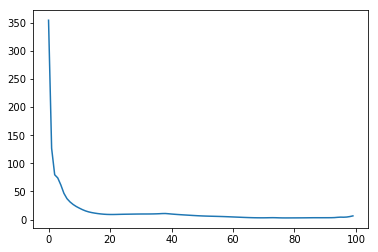

In [252]:
plt.plot(range(len(norm_tr)), norm_tr)

In [257]:
my_submission_2 = sample_submission.copy()

test_users = np.array(ratings_test['user_id'])
test_items = np.array(ratings_test['book_id'])
for i, (user, item) in enumerate(zip(test_users, test_items)):
    if i % 100000 == 0:
        print(i)
    tmp = model_2.predict_for_pair(item=item, user=user).round()
    if (tmp > 5):
        tmp = 5
    elif tmp < 1:
        tmp = 1
    my_submission_2['rating'][i] = tmp

0
100000
200000
300000
400000
500000
600000
700000
800000


In [258]:
my_submission_2.to_csv("my_submission_2.csv", index=False)

In [256]:
(my_submission_2 == my_submission).all()

index      True
rating    False
dtype: bool

In [297]:
norm_trackers = []
time_trackers = []
rmse = []
Ps = []
Qs = []

for n_comps in [2, 4, 8, 16, 32]:
    clear_output()
    print("n_comps = ", n_comps)
    model = lfm.LFM(n_components=n_comps, max_iter=30)
    start_time = timeit.default_timer()
    norm_tr, time_tr = model.fit(X=X_train, trace=True)
    print(timeit.default_timer() - start_time)
    
    Ps.append(model.P)
    Qs.append(model.Q)
    norm_trackers.append(norm_tr)
    time_trackers.append(time_tr)
    
    res_tmp = 0
    k = 1
    for i, _ in enumerate(row_ind[1::2][::k]):
        if i % 1000000 == 0:
            print(i)
        usr = row_ind[1::2][::k][i]
        itm = col_ind[1::2][::k][i]
        res_tmp += ((model.predict_for_pair(item=itm, user=usr) - X_test[usr, itm]) ** 2) / len(row_ind[1::2][::k])
    res_tmp = res_tmp ** 0.5
    rmse.append(res_tmp)

n_comps =  32
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
4393.24271936802
0
1000000
2000000


In [300]:
#with open("exp_3_norm_trackers_time_trackers_rmse_P_Q.pickle", 'wb') as f:
    #pickle.dump((norm_trackers, time_trackers, rmse, Ps, Qs), f)

In [299]:
rmse = []
for i, n_comps in enumerate([2, 4, 8, 16, 32]):
    clear_output()
    print("n_comps = ", n_comps)
    model = lfm.LFM(n_components=n_comps, max_iter=30)
    model.P = Ps[i]
    model.Q = Qs[i]
    
    res_tmp = 0
    k = 1
    for i, _ in enumerate(row_ind[1::2][::k]):
        if i % 1000000 == 0:
            print(i)
        usr = row_ind[1::2][::k][i]
        itm = col_ind[1::2][::k][i]
        res_tmp += ((model.predict_for_pair(item=itm, user=usr) - X_test[usr, itm]) ** 2) / len(row_ind[1::2][::k])
    res_tmp = res_tmp ** 0.5
    rmse.append(res_tmp)

n_comps =  32
0
1000000
2000000


In [345]:
rmse

[0.85339573733563001,
 0.91551381565201362,
 1.0985411999948385,
 1.5241701121512847,
 2.0858138307768765]

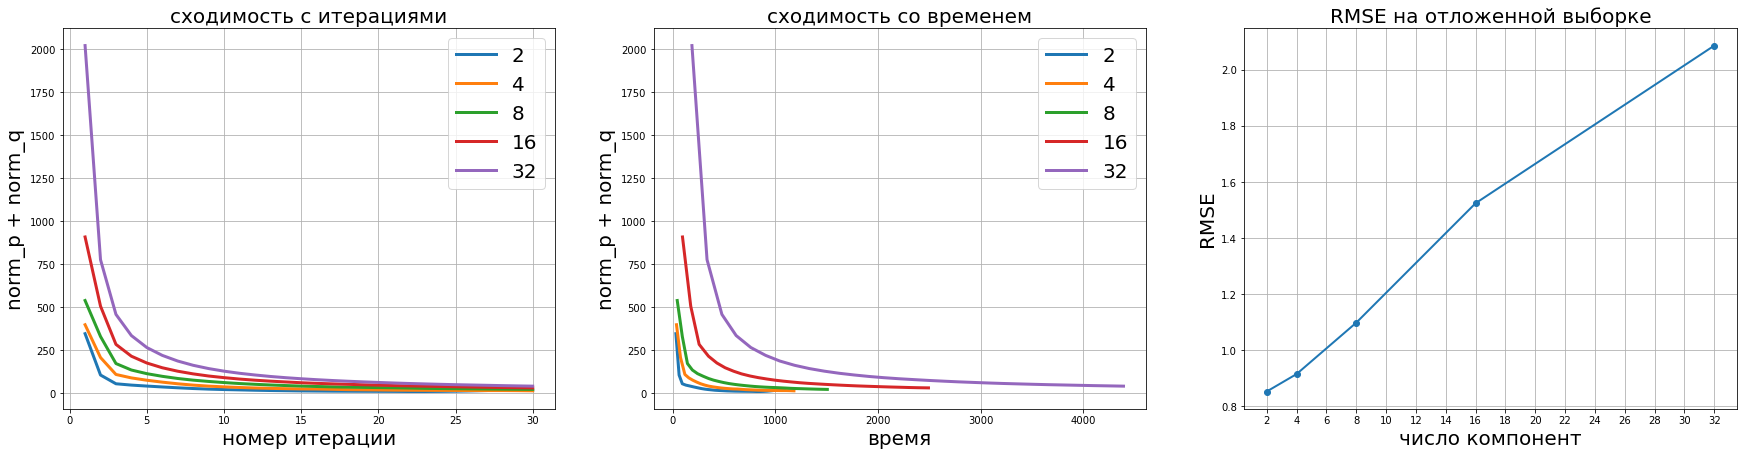

In [421]:
fig, ax = plt.subplots()

fig.set_figwidth(30)
fig.set_figheight(7)

plt.subplot(1, 3, 2)
for i, n_comps in enumerate([2, 4, 8, 16, 32]):
    plt.plot(np.cumsum(time_trackers[i]), np.array(norm_trackers[i]), linewidth=3)
plt.legend([2, 4, 8, 16, 32], fontsize=20)
plt.grid(True)

plt.xlabel('время', fontsize=20)
plt.ylabel('norm_p + norm_q', fontsize=20)
plt.title('сходимость со временем', fontsize=20)

plt.subplot(1, 3, 1)
for i, n_comps in enumerate([2, 4, 8, 16, 32]):
    plt.plot(range(1, len(norm_trackers[i]) + 1), norm_trackers[i], linewidth=3)
plt.legend([2, 4, 8, 16, 32], fontsize=20)
plt.grid(True)
plt.xlabel('номер итерации', fontsize=20)
plt.ylabel('norm_p + norm_q', fontsize=20)
plt.title('сходимость с итерациями', fontsize=20)

plt.subplot(1, 3, 3)
#for i, n_comps in enumerate([2, 4, 8, 16, 32]):
    #plt.plot(np.cumsum(time_trackers[i]), np.array(norm_trackers[i]), linewidth=3)
plt.plot([2, 4, 8, 16, 32], rmse, 'o-', linewidth=2)
plt.xticks(range(2, 34, 2))
#plt.legend([2, 4, 8, 16, 32])
plt.xlabel('число компонент', fontsize=20)
plt.ylabel('RMSE', fontsize=20)
plt.grid(True)
plt.title('RMSE на отложенной выборке', fontsize=20)
fig.savefig('exp3.pdf', bbox_inches='tight')

In [6]:
XT = csr_matrix(X.T)

In [7]:
i_means = []
for i in range(X.shape[1]):
    mean_tmp = (XT[i].toarray().ravel()[XT[i].indices]).mean()
    i_means.append(mean_tmp)

u_means = []
for u in range(X.shape[0]):
    if (u % 10000 == 0):
        clear_output()
        print(u, "/", X.shape[0])
    if not X[u].toarray().any():
        u_means.append(0)
        continue
    mean_tmp = (X[u].toarray().ravel()[X[u].indices]).mean()
    
    u_means.append(mean_tmp)


50000 / 53424


In [8]:
data_smart = data - np.array(i_means)[col_ind] - np.array(u_means)[row_ind]

In [9]:
X_smart = csr_matrix((data_smart, (row_ind, col_ind)), shape=(row_ind.max() + 1, col_ind.max() + 1))
X_train_smart = csr_matrix((data_smart[::2], (row_ind[::2], col_ind[::2])), shape=(row_ind.max() + 1, col_ind.max() + 1))
X_test_smart = csr_matrix((data_smart[1::2], (row_ind[1::2], col_ind[1::2])), shape=(row_ind.max() + 1, col_ind.max() + 1))

In [10]:
model_smart = lfm.LFM(n_components=2, max_iter=30)

In [11]:
start_time = timeit.default_timer()
norm_tr, time_tr = model_smart.fit(X=X_smart, trace=True)
print(timeit.default_timer() - start_time)

#with open("exp_3_model_smart_P_Q.pickle", 'wb') as f:
    #pickle.dump((model_smart.P, model_smart.Q), f)

0
1
2
3
4
5
6
7


KeyboardInterrupt: 

In [472]:
res_tmp_smart = 0
k = 1
for i, _ in enumerate(row_ind[1::2][::k]):
    if i % 1000000 == 0:
        print(i)
    usr = row_ind[1::2][::k][i]
    itm = col_ind[1::2][::k][i]
    res_tmp_smart += ((model_smart.predict_for_pair(item=itm, user=usr) + u_means[usr] + i_means[itm] - X_test[usr, itm]) ** 2) / len(row_ind[1::2][::k])
res_tmp_smart = res_tmp_smart ** 0.5
res_tmp_smart

0
1000000
2000000


0.85294056457804335

In [ ]:
test_users = np.array(ratings_test['user_id'])
test_items = np.array(ratings_test['book_id'])
res_smart = []
for i, (user, item) in enumerate(zip(test_users, test_items)):
    if i % 100000 == 0:
        print(i)
    tmp = model_smart.predict_for_pair(item=item, user=user) + i_means[item] + u_means[user]
    if (tmp > 5.):
        tmp = 5.
    elif tmp < 1.:
        tmp = 1.
    res_smart.append(tmp)
    #my_submission['rating'][i] = tmp

In [ ]:
my_submission_dict_smart = {"index": sample_submission["index"], "rating": res_smart}
my_submission_smart = pd.DataFrame.from_dict(my_submission_dict_smart)
my_submission_smart

In [ ]:
my_submission_smart.to_csv("my_submission_smart.csv", index=False)

In [12]:
my_submission_smart = pd.read_csv("my_submission_smart.csv")

In [8]:
books_data_sorted = books_data.sort_values(by=['book_id'])

In [9]:
books_data_sorted.index = books_data_sorted['book_id']

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
mlb = MultiLabelBinarizer()
ohe = OneHotEncoder()

In [11]:
books_data_sorted_authors_encoded = mlb.fit_transform(np.array(books_data_sorted['authors']))

In [12]:
authors_encoded = np.array(books_data_sorted['authors'])
for i, elem in enumerate(authors_encoded):
    authors_encoded[i] = elem.split(', ')
authors_encoded = mlb.fit_transform(authors_encoded)


In [13]:
print(authors_encoded[:, authors_encoded.sum(axis=0) > 12].shape)
authors_encoded_10 = authors_encoded[:, authors_encoded.sum(axis=0) > 10]

(10000, 132)


In [13]:
authors_encoded_15 = authors_encoded[:, authors_encoded.sum(axis=0) > 15]

In [34]:
csr_matrix(np.array(books_data_sorted['original_publication_year'][ratings_train['book_id']]))

<1x5022561 sparse matrix of type '<class 'numpy.float64'>'
	with 5022561 stored elements in Compressed Sparse Row format>

In [29]:
np.array(books_data_sorted['original_publication_year'][ratings_train['book_id']])

array([ 2003.,  2006.,  1998., ...,  1882.,  2016.,  1985.])

In [14]:
X_features = np.ones((ratings_train.shape[0], 170 + 4))
X_features.shape

(5022561, 174)

In [15]:
X_features[:, 0] = np.array(ratings_train['time'])

In [16]:
X_features[:, 1] = books_data_sorted['original_publication_year'][ratings_train['book_id']]

In [17]:
X_features[:, 2] = np.array(u_means)[ratings_train['user_id'].values]

In [18]:
X_features[:, 3] = np.array(i_means)[ratings_train['book_id'].values]

In [19]:
X_features[:, 4:] = authors_encoded_10[ratings_train['book_id'].values]

In [20]:
y_train = ratings_train['rating'].values

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge

In [23]:
X_features = np.nan_to_num(X_features)

In [ ]:
from scipy.sparse import csc_matrix

In [ ]:
X_features = csc_matrix(X_features)

In [33]:
clf = ExtraTreesRegressor(max_depth=5, n_estimators=25, warm_start=True)

start_time = timeit.default_timer()
clf.fit(X_features[::8], y_train[::8]) 
print(timeit.default_timer() - start_time)

205.40191317501012


In [38]:
clf.n_estimators = 50
start_time = timeit.default_timer()
clf.fit(X_features[2::8], y_train[2::8]) 
print(timeit.default_timer() - start_time)

220.31297765800264


In [40]:
clf.n_estimators = 75
start_time = timeit.default_timer()
clf.fit(X_features[4::8], y_train[4::8]) 
print(timeit.default_timer() - start_time)

204.96790266688913


In [42]:
clf.n_estimators = 100
start_time = timeit.default_timer()
clf.fit(X_features[6::8], y_train[6::8]) 
print(timeit.default_timer() - start_time)

232.40233317308594


In [39]:
y_val = clf.predict(X_features[1::2])
print((((y_val - y_train[1::2]) ** 2).sum() / len(y_val)) ** 0.5)

0.865554015433


In [41]:
y_val = clf.predict(X_features[1::2])
print((((y_val - y_train[1::2]) ** 2).sum() / len(y_val)) ** 0.5)

0.864125462411


In [43]:
y_val = clf.predict(X_features[1::2])
print((((y_val - y_train[1::2]) ** 2).sum() / len(y_val)) ** 0.5)

0.863369980806


In [69]:
y_val_etr = y_val


In [70]:
print((((y_val - y_train[1::2]) ** 2).sum() / len(y_val)) ** 0.5)

0.863369980806


In [44]:
clf.n_estimators = 125
start_time = timeit.default_timer()
clf.fit(X_features[1::8], y_train[1::8]) 
print(timeit.default_timer() - start_time)

218.51093049591873


In [45]:
clf.n_estimators = 150
start_time = timeit.default_timer()
clf.fit(X_features[3::8], y_train[3::8]) 
print(timeit.default_timer() - start_time)

194.31794124492444


In [46]:
clf.n_estimators = 175
start_time = timeit.default_timer()
clf.fit(X_features[5::8], y_train[5::8]) 
print(timeit.default_timer() - start_time)

196.59506780095398


In [47]:
clf.n_estimators = 200
start_time = timeit.default_timer()
clf.fit(X_features[7::8], y_train[7::8]) 
print(timeit.default_timer() - start_time)

198.3348333699396


In [48]:
X_features_test = np.ones((ratings_test.shape[0], 170 + 4))

In [49]:
X_features_test[:, 0] = np.array(ratings_test['time'])

In [50]:
X_features_test[:, 1] = books_data_sorted['original_publication_year'][ratings_test['book_id']]

In [51]:
X_features_test[:, 2] = np.array(u_means)[ratings_test['user_id'].values]

In [52]:
X_features_test[:, 3] = np.array(i_means)[ratings_test['book_id'].values]

In [53]:
X_features_test[:, 4:] = authors_encoded_10[ratings_test['book_id'].values]

In [54]:
X_features_test = np.nan_to_num(X_features_test)

In [55]:
X_features_test = csr_matrix(X_features_test)

In [56]:
y_test_10 = clf.predict(X_features_test)

In [57]:
y_test_10[y_test_10 < 1] = 1.

In [58]:
y_test_10[y_test_10 > 5] = 5.

In [59]:
my_submission_dict_features_10 = {"index": sample_submission["index"], "rating": y_test_10}
my_submission_smart_features_10 = pd.DataFrame.from_dict(my_submission_dict_features_10)
my_submission_smart_features_10

,index,rating
0,0,3.686438
1,1,3.585591
2,2,4.354274
3,3,3.207848
4,4,3.800276
5,5,4.249980
6,6,4.254728
7,7,4.548839
8,8,4.007487
9,9,3.499816


In [60]:
my_submission_smart_features_10.to_csv("my_submission_features_10.csv", index=False)

In [61]:
my_submission_smart = pd.read_csv("my_submission_smart.csv")

In [ ]:
my_submission_smart_features = pd.read_csv("my_submission_features.csv")

In [62]:
y_lfm = my_submission_smart['rating'].values

In [63]:
my_submission_dict_mixed = {"index": sample_submission["index"], "rating": 0.3 * y_test_10 + 0.7 * y_lfm}
my_submission_mixed = pd.DataFrame.from_dict(my_submission_dict_mixed)
my_submission_mixed

,index,rating
0,0,3.848569
1,1,3.604221
2,2,4.400677
3,3,2.949400
4,4,3.988095
5,5,4.502210
6,6,4.169734
7,7,4.620536
8,8,3.881483
9,9,3.475043


In [64]:
my_submission_mixed.to_csv("my_submission_mixed.csv", index=False)

# Лучшая модель на lfm

In [62]:
data_smart = data - np.array(i_means)[col_ind] - np.array(u_means)[row_ind]

In [63]:
X_smart = csr_matrix((data_smart, (row_ind, col_ind)), shape=(row_ind.max() + 1, col_ind.max() + 1))
X_train_smart = csr_matrix((data_smart[::2], (row_ind[::2], col_ind[::2])), shape=(row_ind.max() + 1, col_ind.max() + 1))
X_test_smart = csr_matrix((data_smart[1::2], (row_ind[1::2], col_ind[1::2])), shape=(row_ind.max() + 1, col_ind.max() + 1))

In [67]:
model_smart = lfm.LFM(n_components=2, max_iter=30)

In [68]:
start_time = timeit.default_timer()
norm_tr, time_tr = model_smart.fit(X=X_train_smart, trace=True)
print(timeit.default_timer() - start_time)

#with open("exp_3_model_train_smart_P_Q.pickle", 'wb') as f:
    #pickle.dump((model_smart.P, model_smart.Q), f)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
852.8850354870083


In [73]:
y_val_lfm = []
res_tmp_smart = 0
k = 1
for i, _ in enumerate(row_ind[1::2][::k]):
    if i % 1000000 == 0:
        clear_output()
        print(i)
    usr = row_ind[1::2][::k][i]
    itm = col_ind[1::2][::k][i]
    pred = model_smart.predict_for_pair(item=itm, user=usr) + u_means[usr] + i_means[itm]
    if pred < 1.:
        print('<1')
        #pred = 1.
    elif pred > 5.0:
        print('>5')
        #pred = 5.0
    y_val_lfm.append(pred)
    res_tmp_smart += ((pred - X_test[usr, itm]) ** 2) / len(row_ind[1::2][::k])
res_tmp_smart = res_tmp_smart ** 0.5
with open("exp_3_model_train_smart_y_val_lfm.pickle", 'wb') as f:
    pickle.dump(y_val_lfm, f)

res_tmp_smart

2000000
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5

>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>

>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>

>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>

>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
<1
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>5
>

0.85017890452941203

In [11]:
with open("exp_3_model_train_smart_y_val_lfm.pickle", 'rb') as f:
    y_val_lfm = pickle.load(f)

In [74]:
res_tmp_smart

0.85017890452941203

In [75]:
y_val_lfm = np.array(y_val_lfm)
print((((y_val_lfm - y_train[1::2]) ** 2).sum() / len(y_val_lfm)) ** 0.5)

0.850178904529


In [76]:
y_val_lfm_cut = y_val_lfm.copy()
y_val_lfm_cut[y_val_lfm_cut > 5.0] = 5.0
y_val_lfm_cut[y_val_lfm_cut < 1.0] = 1.0

In [77]:
print((((y_val_lfm_cut - y_train[1::2]) ** 2).sum() / len(y_val_lfm_cut)) ** 0.5)

0.845286633807


In [78]:
y_val_mixed = 0.3 * y_val_etr + 0.7 * y_val_lfm

In [79]:
print((((y_val_mixed - y_train[1::2]) ** 2).sum() / len(y_val_mixed)) ** 0.5)

0.838896554954


In [80]:
y_val_mixed_cut = 0.3 * y_val_etr + 0.7 * y_val_lfm_cut

In [81]:
print((((y_val_mixed_cut - y_train[1::2]) ** 2).sum() / len(y_val_mixed_cut)) ** 0.5)

0.836724881556


In [82]:
y_val_mixed_cut = 0.5 * y_val_etr + 0.5 * y_val_lfm_cut
print((((y_val_mixed_cut - y_train[1::2]) ** 2).sum() / len(y_val_mixed_cut)) ** 0.5)

0.837722817655


In [83]:
y_val_mixed_cut = 0.4 * y_val_etr + 0.6 * y_val_lfm_cut
print((((y_val_mixed_cut - y_train[1::2]) ** 2).sum() / len(y_val_mixed_cut)) ** 0.5)

0.836550572139


In [84]:
y_val_mixed_cut = 0.35 * y_val_etr + 0.65 * y_val_lfm_cut
print((((y_val_mixed_cut - y_train[1::2]) ** 2).sum() / len(y_val_mixed_cut)) ** 0.5)

0.836469307678


In [85]:
y_val_mixed_cut = 0.37 * y_val_etr + 0.63 * y_val_lfm_cut
print((((y_val_mixed_cut - y_train[1::2]) ** 2).sum() / len(y_val_mixed_cut)) ** 0.5)

0.836461389244


In [55]:
y_val_mixed_cut = 0.36 * y_val_etr + 0.64 * y_val_lfm_cut
print((((y_val_mixed_cut - y_train[1::2]) ** 2).sum() / len(y_val_mixed_cut)) ** 0.5)

NameError: name 'y_val_etr' is not defined

In [135]:
my_submission_ensemble.to_csv("my_submission_ensemble.csv", index=False)

In [92]:
X_smart = csr_matrix((data_smart, (row_ind, col_ind)), shape=(row_ind.max() + 1, col_ind.max() + 1))
X_train_smart = csr_matrix((data_smart[::2], (row_ind[::2], col_ind[::2])), shape=(row_ind.max() + 1, col_ind.max() + 1))
X_test_smart = csr_matrix((data_smart[1::2], (row_ind[1::2], col_ind[1::2])), shape=(row_ind.max() + 1, col_ind.max() + 1))
X_test_smart_small = csr_matrix((data_smart[1::200], (row_ind[1::200], col_ind[1::200])), shape=(row_ind.max() + 1, col_ind.max() + 1))



In [97]:
reload(lfm)

<module 'lfm' from '/Users/Galya/Documents/studying/6th_semester/prac/task_3/lfm.py'>

In [98]:
res = []

for lamb in [10, 1, 1e-1]:
    clear_output()
    model_smart = lfm.LFM(n_components=100, max_iter=10, lamb=lamb)
    start_time = timeit.default_timer()
    model_smart.fit(X=X_train_smart)
    print(timeit.default_timer() - start_time)
    res_tmp_smart = 0
    k = 1
    for i, _ in enumerate(row_ind[1::2][::k]):
        usr = row_ind[1::2][::k][i]
        itm = col_ind[1::2][::k][i]
        pred = model_smart.predict_for_pair(item=itm, user=usr) + u_means[usr] + i_means[itm]
        if pred < 1.:
            pred = 1.
        elif pred > 5.0:
            pred = 5.0
        res_tmp_smart += ((pred - X_test[usr, itm]) ** 2) / len(row_ind[1::2][::k])
    res_tmp_smart = res_tmp_smart ** 0.5
    res.append(res_tmp_smart)

9500
619.8796311509795
6338.426639363985


In [99]:
res

[1.3051843949908517, 1.0915673422437862, 1.0703130355984922]

In [100]:
res_50 = []
for lamb in [1, 1e-1, 1e-3, 1e-5]:
    clear_output()
    model_smart = lfm.LFM(n_components=50, max_iter=10, lamb=lamb, mu=10)
    start_time = timeit.default_timer()
    model_smart.fit(X=X_train_smart)
    print(timeit.default_timer() - start_time)
    res_tmp_smart = 0
    k = 1
    for i, _ in enumerate(row_ind[1::2][::k]):
        usr = row_ind[1::2][::k][i]
        itm = col_ind[1::2][::k][i]
        pred = model_smart.predict_for_pair(item=itm, user=usr) + u_means[usr] + i_means[itm]
        if pred < 1.:
            pred = 1.
        elif pred > 5.0:
            pred = 5.0
        res_tmp_smart += ((pred - X_test[usr, itm]) ** 2) / len(row_ind[1::2][::k])
    res_tmp_smart = res_tmp_smart ** 0.5
    res_50.append(res_tmp_smart)

9500
221.36748683894984
2202.996791323065


In [101]:
res_50

[1.0537880468972793,
 1.2280637495701012,
 1.5775682966397564,
 1.6800131228203758]

In [103]:
res_50_1 = []
for lamb in [1, 1e-1, 1e-3]:
    clear_output()
    model_smart = lfm.LFM(n_components=50, max_iter=10, lamb=lamb, mu=1)
    start_time = timeit.default_timer()
    model_smart.fit(X=X_train_smart)
    print(timeit.default_timer() - start_time)
    res_tmp_smart = 0
    k = 1
    for i, _ in enumerate(row_ind[1::2][::k]):
        usr = row_ind[1::2][::k][i]
        itm = col_ind[1::2][::k][i]
        pred = model_smart.predict_for_pair(item=itm, user=usr) + u_means[usr] + i_means[itm]
        if pred < 1.:
            pred = 1.
        elif pred > 5.0:
            pred = 5.0
        res_tmp_smart += ((pred - X_test[usr, itm]) ** 2) / len(row_ind[1::2][::k])
    res_tmp_smart = res_tmp_smart ** 0.5
    res_50_1.append(res_tmp_smart)

9500
323.2916212970158
3024.5776394279674


In [104]:
res_50_1

[1.1511533851109403, 1.2713722532853309, 1.582106502213356]

In [107]:
res_50_1_lamb = []
for mu in [500]:
    clear_output()
    model_smart = lfm.LFM(n_components=50, max_iter=10, lamb=1, mu=mu)
    start_time = timeit.default_timer()
    model_smart.fit(X=X_train_smart)
    print(timeit.default_timer() - start_time)
    res_tmp_smart = 0
    k = 1
    for i, _ in enumerate(row_ind[1::2][::k]):
        usr = row_ind[1::2][::k][i]
        itm = col_ind[1::2][::k][i]
        pred = model_smart.predict_for_pair(item=itm, user=usr) + u_means[usr] + i_means[itm]
        if pred < 1.:
            pred = 1.
        elif pred > 5.0:
            pred = 5.0
        res_tmp_smart += ((pred - X_test[usr, itm]) ** 2) / len(row_ind[1::2][::k])
    res_tmp_smart = res_tmp_smart ** 0.5
    res_50_1_lamb.append(res_tmp_smart)

9500
242.9497773629846
2413.6276736139553


In [108]:
res_50_1_lamb

[0.91131931289315038]

In [ ]:
res_20 = []
norms = []
clear_output()
model_smart = lfm.LFM(n_components=20, max_iter=30, lamb=1, mu=1000)
start_time = timeit.default_timer()
norms.append(model_smart.fit(X=X_train_smart, trace=True))
print(timeit.default_timer() - start_time)
res_tmp_smart = 0
k = 1
for i, _ in enumerate(row_ind[1::2][::k]):
    usr = row_ind[1::2][::k][i]
    itm = col_ind[1::2][::k][i]
    pred = model_smart.predict_for_pair(item=itm, user=usr) + u_means[usr] + i_means[itm]
    if pred < 1.:
        pred = 1.
    elif pred > 5.0:
        pred = 5.0
    res_tmp_smart += ((pred - X_test[usr, itm]) ** 2) / len(row_ind[1::2][::k])
res_tmp_smart = res_tmp_smart ** 0.5
res_20.append(res_tmp_smart)

8000


In [ ]:
res_20

In [104]:
res_50_1

[1.1511533851109403, 1.2713722532853309, 1.582106502213356]

In [110]:
res_50_30 = []

clear_output()
model_smart = lfm.LFM(n_components=50, max_iter=30, lamb=1, mu=500)
start_time = timeit.default_timer()
model_smart.fit(X=X_train_smart)
print(timeit.default_timer() - start_time)
res_tmp_smart = 0
k = 1
for i, _ in enumerate(row_ind[1::2][::k]):
    usr = row_ind[1::2][::k][i]
    itm = col_ind[1::2][::k][i]
    pred = model_smart.predict_for_pair(item=itm, user=usr) + u_means[usr] + i_means[itm]
    if pred < 1.:
        pred = 1.
    elif pred > 5.0:
        pred = 5.0
    res_tmp_smart += ((pred - X_test[usr, itm]) ** 2) / len(row_ind[1::2][::k])
res_tmp_smart = res_tmp_smart ** 0.5
res_50_30.append(res_tmp_smart)

res_50_30

9500
192.31727667001542
6114.13660846604


[0.89606568146561216]

res_50_30 :


9500
192.31727667001542
6114.13660846604
Out[110]:
[0.89606568146561216]

In [112]:
res_50_50 = []

clear_output()
model_smart = lfm.LFM(n_components=50, max_iter=50, lamb=1, mu=500)
start_time = timeit.default_timer()
model_smart.fit(X=X_train_smart)
print(timeit.default_timer() - start_time)
res_tmp_smart = 0
k = 1
for i, _ in enumerate(row_ind[1::2][::k]):
    usr = row_ind[1::2][::k][i]
    itm = col_ind[1::2][::k][i]
    pred = model_smart.predict_for_pair(item=itm, user=usr) + u_means[usr] + i_means[itm]
    if pred < 1.:
        pred = 1.
    elif pred > 5.0:
        pred = 5.0
    res_tmp_smart += ((pred - X_test[usr, itm]) ** 2) / len(row_ind[1::2][::k])
res_tmp_smart = res_tmp_smart ** 0.5
res_50_50.append(res_tmp_smart)

res_50_50

9500
237.64412996801548
11980.075750024058


[0.89567848801353966]

In [71]:
for mu in [1, 1e-1, 1e-3, 1e-4, 1e-5]:
    model_smart = lfm.LFM(n_components=100, max_iter=30, mu=mu)
    start_time = timeit.default_timer()
    model_smart.fit(X=X_train_smart)
    print(timeit.default_timer() - start_time)
    res_tmp_smart = 0
    k = 1
    for i, _ in enumerate(row_ind[1::2][::k]):
        if i % 1000000 == 0:
            clear_output()
            print(i)
        usr = row_ind[1::2][::k][i]
        itm = col_ind[1::2][::k][i]
        pred = model_smart.predict_for_pair(item=itm, user=usr) + u_means[usr] + i_means[itm]
        if pred < 1.:
            pred = 1.
        elif pred > 5.0:
            pred = 5.0
        res_tmp_smart += ((pred - X_test[usr, itm]) ** 2) / len(row_ind[1::2][::k])
    res_tmp_smart = res_tmp_smart ** 0.5
    print('mu = ', mu, ', val rmse = ', res_tmp_smart)

KeyboardInterrupt: 

In [68]:
start_time = timeit.default_timer()
norm_tr, time_tr = model_smart.fit(X=X_train_smart, trace=True)
print(timeit.default_timer() - start_time)

#with open("exp_3_model_train_smart_P_Q.pickle", 'wb') as f:
    #pickle.dump((model_smart.P, model_smart.Q), f)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
852.8850354870083
